In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_valid, y_valid) = cifar10.load_data()

print(f"Train set shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test set shape: {x_valid.shape}, Labels shape: {y_valid.shape}")

x_train, x_valid = x_train / 255.0, x_valid / 255.0


Train set shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
valid_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode y_train
y_valid = to_categorical(y_valid, num_classes=10)

In [ ]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
valid_generator = valid_datagen.flow(x_valid, y_valid, batch_size=32)

In [ ]:
from tensorflow.keras.regularizers import l2
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3,3),
                           padding = "valid",
                           kernel_initializer="he_normal",
                           input_shape=(32,32,3)), # Changed input shape to (32, 32, 3)
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = (3,3),
                           padding = "valid",
                           kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters = 128,
                           kernel_size = (3,3),
                           padding = "valid",
                           kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="categorical_crossentropy",
                optimizer=optimizer,
                metrics=['accuracy'])
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("MyCheckpoint.weights.h5",
                                                   save_weights_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 10,
                                                   restore_best_weights = True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=50,
    verbose=1,
    callbacks = [checkpoint_cb,early_stopping_cb,lr_scheduler]
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.7582 - loss: 0.8482 - val_accuracy: 0.7436 - val_loss: 0.9524 - learning_rate: 0.0100
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7613 - loss: 0.9169 - val_accuracy: 0.7871 - val_loss: 0.8596 - learning_rate: 0.0100
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7696 - loss: 0.9053 - val_accuracy: 0.7291 - val_loss: 1.1019 - learning_rate: 0.0100
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7697 - loss: 0.9145 - val_accuracy: 0.7593 - val_loss: 0.9862 - learning_rate: 0.0100
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7700 - loss: 0.9088 - val_accuracy: 0.7465 - val_loss: 1.0395 - learning_rate: 0.0100
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.7903 - loss: 0.8420 - val_accuracy: 0.8036 - val_loss: 0.7945 - learning_rate: 0.0050
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accura

In [ ]:
os.makedirs("images_2")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


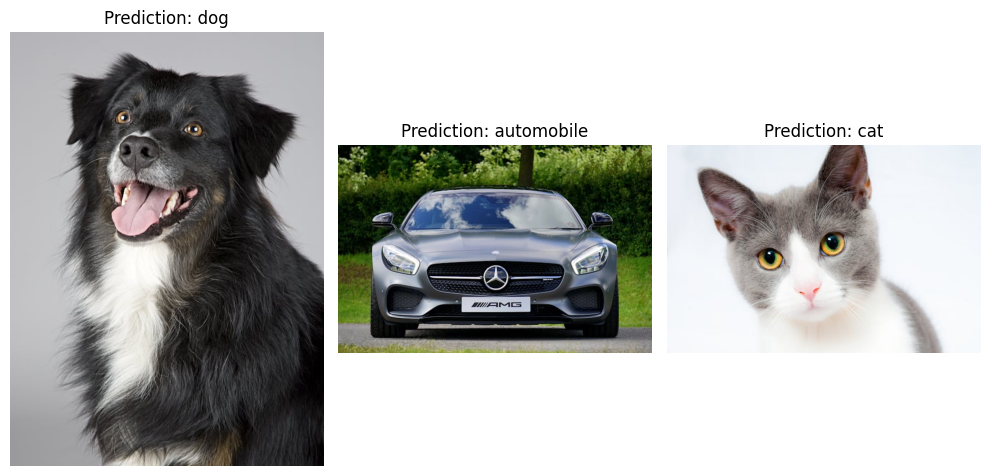

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the model weights
model.load_weights("MyCheckpoint.weights.h5")
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Resimlerin bulunduğu klasör
image_folder = "/content/images_2"  # Tüm resimleri koyduğun klasör adı
image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpeg") or f.endswith(".jpg") or f.endswith(".png")]

num_images = len(image_files)
cols = 3
rows = (num_images // cols) + (num_images % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.flatten()

for i, img_name in enumerate(image_files):
    img_path = os.path.join(image_folder, img_name)
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    axes[i].imshow(image.load_img(img_path))
    axes[i].set_title(f"Prediction: {class_names[predicted_class]}")
    axes[i].axis("off")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()